<a href="https://colab.research.google.com/github/aditeyabaral/Bengaluru-International-Airport/blob/master/Weekly%20Asignments%20-%20Answers/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Files

## Loading files and functions

In [15]:
!unzip News.zip

Archive:  News.zip
replace News/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
import os
f = [open(r"News/"+i, encoding = 'utf-8') for i in os.listdir(r"News/")]
documents = []
for i in range(len(f)):
  try:
    documents.append(f[i].read())
  except:
    print("Extraction of",f[i],"failed.")

## Importing packages

In [17]:
import nltk
nltk.download("all")
import TextPreprocessing
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, make_scorer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

## Creating Vector Space

In [18]:
%%time
cleaned_documents = list(map(TextPreprocessing.clean,documents))
vectorizer = TfidfVectorizer(smooth_idf = True)
X = vectorizer.fit_transform(cleaned_documents).toarray()
X.shape

CPU times: user 17.8 s, sys: 492 ms, total: 18.3 s
Wall time: 18.3 s


# Question 1
You have recently been hired at an upcoming news agency as a Machine Learning engineer and they require your help. They have provided you with a zip file (News.zip) which contains over 2000 news articles across various topics like sports, politics, business etc. However, you have not been provided with the number of topics since the agency never kept a track. They need you to effectively find out the various domains of news so they can segment their news articles into the underlying topics and create separate archives for the different categories. They also want you to -

* Find out the top 5 relevant terms in each category so they can use these to quickly segment other documents 
* Obtain a mapping of which document belongs to which topic 


## Visualizing Clusters - 5 topics

### UMAP - 5 clusters

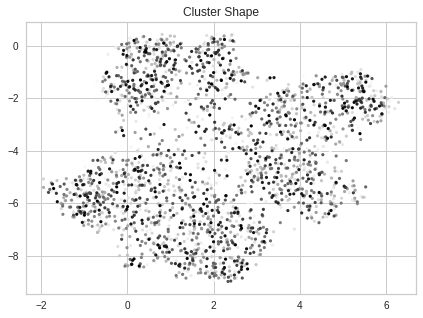

CPU times: user 2min 28s, sys: 690 ms, total: 2min 29s
Wall time: 2min 30s


In [0]:
%%time
embedding = umap.UMAP(n_neighbors=200, min_dist=0.5, random_state=12, metric = "cosine").fit_transform(X)
plt.figure(figsize=(7,5))
plt.title("Cluster Shape")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c = [(i+1) for i in range(len(X))],s = 10, edgecolor='none')
plt.show()

### KMeans - 6 clusters

#### Manually finding WCSS and Silhouette Score

##### WCSS

In [0]:
%%time
max_k = 10
sil_scores = []
wcss = []
for k in range(2,max_k+1):
    model = KMeans(n_clusters=k,n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    sil_scores.append(silhouette_score(X,model.labels_,metric='cosine'))
    wcss.append(model.inertia_)

CPU times: user 1min 18s, sys: 7.36 s, total: 1min 26s
Wall time: 17min 14s


Text(0.5, 1.0, 'K vs WCSS')

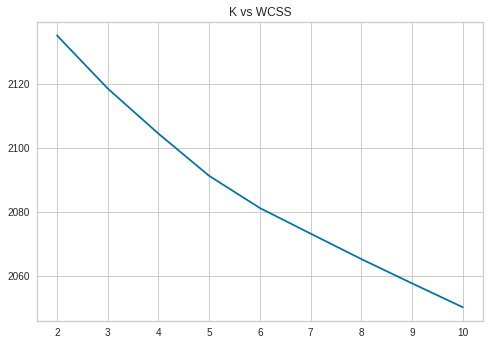

In [0]:
plt.plot([i for i in range(2,max_k+1)],wcss)
plt.title("K vs WCSS")

##### Silhouette Score

Text(0.5, 1.0, 'K vs Silhouette Scores')

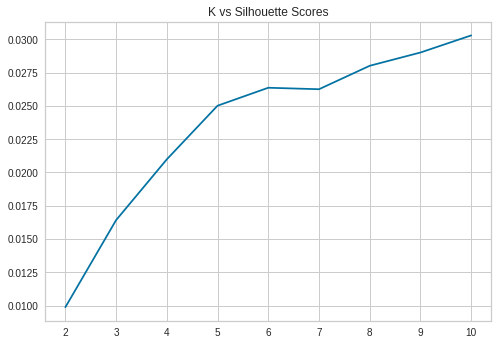

In [0]:
plt.plot([i for i in range(2,max_k+1)],sil_scores)
plt.title("K vs Silhouette Scores")

#### Using libraries to find WCSS and Silhouette Scores

##### WCSS

CPU times: user 8.38 s, sys: 3.71 s, total: 12.1 s
Wall time: 10min 5s


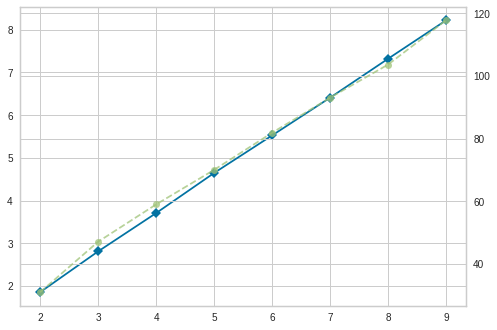

In [0]:
'''%%time
model = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10))        
visualizer.fit(X)'''    

##### Silhouette Score

CPU times: user 1min 5s, sys: 5.29 s, total: 1min 10s
Wall time: 10min 44s


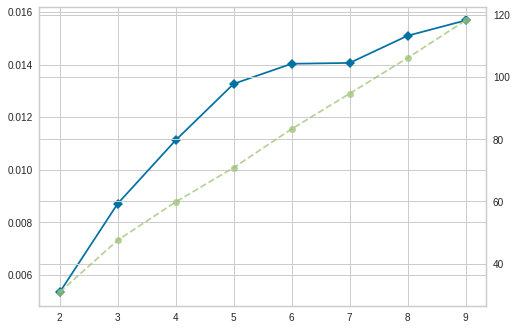

In [0]:
'''%%time
model = KMeans(n_jobs=-1,init='k-means++', max_iter=300, n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette')
visualizer.fit(X)'''

### Hierarchical Clustering - 6 clusters

CPU times: user 1min, sys: 19.8 ms, total: 1min
Wall time: 1min


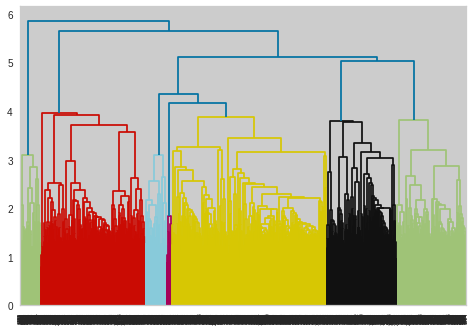

In [0]:
%%time
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))

### DBSCAN - 6 clusters

#### Finding Epsilon: [0.5, 1] - 0.8 best curve

CPU times: user 4min 25s, sys: 55.5 ms, total: 4min 25s
Wall time: 4min 25s


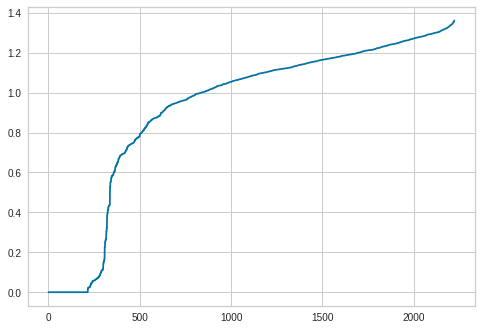

In [0]:
%%time
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Manually: eps = 0.8, min_samples = 23, 6 clusters

In [0]:
%%time
Points = 50
sil_scores = []
clusters = []
samples = []
for minPts in range(3,Points+1):
    print(minPts, end = " ")
    samples.append(minPts)
    model = DBSCAN(eps = 0.8, min_samples = minPts, metric = "cosine", n_jobs = -1)
    model.fit(X)
    classes = model.labels_
    clusters.append(len(set(classes[classes!=-1])))
    if clusters[-1] < 2:
      sil_scores.append(-1)
    else:
      sil_scores.append(silhouette_score(X,model.labels_,metric='cosine'))

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 CPU times: user 17min 57s, sys: 30.6 s, total: 18min 27s
Wall time: 9min 35s


In [0]:
max_index = sil_scores.index(max(sil_scores))
clusters[max_index], samples[max_index]

(6, 23)

Text(0.5, 1.0, 'MinPts vs Silhouette Scores')

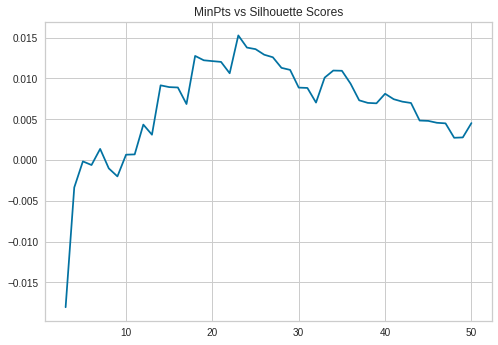

In [0]:
plt.plot(samples,sil_scores)
plt.title("MinPts vs Silhouette Scores")

#### GridSearch: eps = 0.7, min_samples = 5, 42 clusters

In [0]:
%%time
model = DBSCAN(metric = "cosine", n_jobs = -1)
parameters = {"eps":[0.6,0.7,0.8], "min_samples":list(range(5,40))}

def scorer(model, X):
  classes = model.labels_
  if len(set(classes)) < 2:
    return -1
  return silhouette_score(X,model.labels_, metric = "cosine")

grid = GridSearchCV(estimator=model,param_grid=parameters,scoring=scorer,cv=[(slice(None), slice(None))],n_jobs=-1)
grid.fit(X)

CPU times: user 15.7 s, sys: 979 ms, total: 16.7 s
Wall time: 19min 26s


In [0]:
grid.best_params_

{'eps': 0.7, 'min_samples': 5}

In [0]:
%%time
dbscan = DBSCAN(eps = 0.7, min_samples = 5, metric = "cosine",n_jobs = -1)
dbscan.fit(X)
classes = dbscan.labels_
print(len(set(classes[classes!=-1])))

42
CPU times: user 15 s, sys: 637 ms, total: 15.6 s
Wall time: 8.04 s


## Finding Topics

In [0]:
k = 5
classes = ["Topic {}".format(i+1) for i in range(k)]

def LSA(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X)
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=500, random_state=122)
    lsa = svd.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(lsa,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = classes, columns = (dic)).T
    return lsa, document_topic_matrix, term_topic_matrix

def NMFFunction(k, X):
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X)
    model = NMF(n_components=k, random_state=122, init='nndsvd', max_iter = 500)
    topicmodel = model.fit_transform(X_transformed) 
    document_topic_matrix = pd.DataFrame(topicmodel,columns=classes, index = X)
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(model.components_, index = classes, columns = (dic)).T
    return topicmodel, document_topic_matrix, term_topic_matrix

In [0]:
%%time
lsa, document_topic_matrix_lsa, term_topic_matrix_lsa = LSA(k, cleaned_documents) 
nmf, document_topic_matrix_nmf, term_topic_matrix_nmf = NMFFunction(k, cleaned_documents)

CPU times: user 16.3 s, sys: 11.6 s, total: 27.9 s
Wall time: 14.7 s


## Obtaining top 10 Terms per Topic

In [0]:
%%time
top_10_lsa = dict()
top_10_nmf = dict()

for topic in term_topic_matrix_lsa.columns:

  top_10_lsa[topic] = list()
  top_10_nmf[topic] = list()

  term_topic_matrix_lsa.sort_values(by = topic, inplace = True, ascending = False)
  term_topic_matrix_nmf.sort_values(by = topic, inplace = True, ascending = False)

  for i in range(10):
    top_10_lsa[topic].append(term_topic_matrix_lsa.index[i])
    top_10_nmf[topic].append(term_topic_matrix_nmf.index[i])

top10_term_topic_df_lsa = pd.DataFrame()
top10_term_topic_df_nmf = pd.DataFrame()

for i in top_10_lsa:
  top10_term_topic_df_lsa[i] = top_10_lsa[i]
  top10_term_topic_df_nmf[i] = top_10_nmf[i]

CPU times: user 65.5 ms, sys: 43.8 ms, total: 109 ms
Wall time: 59.1 ms


In [0]:
top10_term_topic_df_lsa

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,said,mr,win,film,mobil
1,mr,labour,england,award,phone
2,would,elect,best,best,use
3,year,blair,play,oscar,peopl
4,peopl,parti,labour,nomin,technolog
5,game,tori,film,actor,game
6,labour,tax,award,star,user
7,us,brown,game,music,digit
8,elect,minist,blair,actress,servic
9,govern,govern,elect,festiv,music


In [0]:
top10_term_topic_df_nmf

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,game,mr,mobil,film,bn
1,england,labour,phone,award,growth
2,play,elect,use,best,economi
3,win,blair,peopl,oscar,us
4,player,parti,technolog,star,bank
5,nt,tori,music,nomin,rate
6,wale,brown,servic,actor,said
7,match,said,user,actress,year
8,said,tax,said,festiv,price
9,team,would,digit,director,econom


## Obtaining Document Classification

In [0]:
%%time
document_class = pd.DataFrame()
document_class["Document"] = document_topic_matrix_lsa.index

t1 = document_topic_matrix_lsa[classes]
t1.reset_index(inplace = True)
t1.drop(columns = "index",inplace=True)
  

t2 = document_topic_matrix_nmf[classes]
t2.reset_index(inplace = True)
t2.drop(columns = "index",inplace=True)

document_class["LSA"] = t1.idxmax(axis = 1)
document_class["LSA"] = document_class["LSA"].apply(lambda x: int(x.split()[1]))
document_class["NMF"] = t1.idxmax(axis = 1)
document_class["NMF"] = document_class["NMF"].apply(lambda x: int(x.split()[1]))

CPU times: user 20.3 ms, sys: 41 µs, total: 20.3 ms
Wall time: 20.4 ms


In [0]:
document_class.head(10)

,Document,LSA,NMF
0,readi inform act thousand public bodi illprepa...,1,1
1,khodorkovski alli deni charg close associ form...,1,1
2,us duo first spam convict brother sister us co...,1,1
3,huge rush jet airway share indian airlin jet a...,1,1
4,labour face cold call inquiri labour investig ...,1,1
5,blog take mainstream web log blog everywher le...,1,1
6,laser help bridg network gap indian telecommun...,1,1
7,moya emot davi cup win carlo moya describ spai...,1,1
8,watchdog probe vivendi bond sale french stock ...,1,1
9,california set fine spywar maker comput progra...,1,1


In [0]:
matches = sum(document_class["LSA"]==document_class["NMF"])
matches

2224

(array([1919.,    0.,   55.,    0.,    0.,   45.,    0.,  140.,    0.,
          65.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

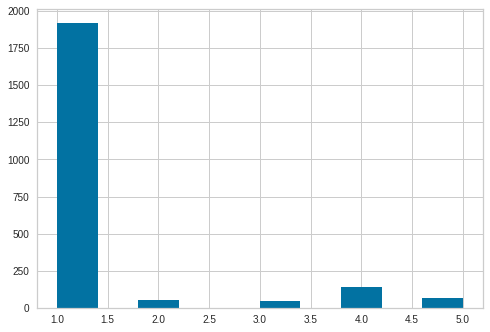

In [0]:
plt.hist(document_class["LSA"])

## Visualizing Topics

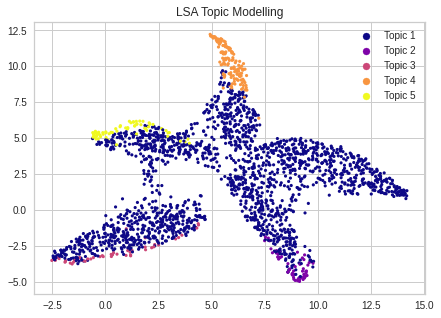

In [0]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lsa)
plt.figure(figsize=(7,5))
plt.title("LSA Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, c= document_class["LSA"], edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.show()

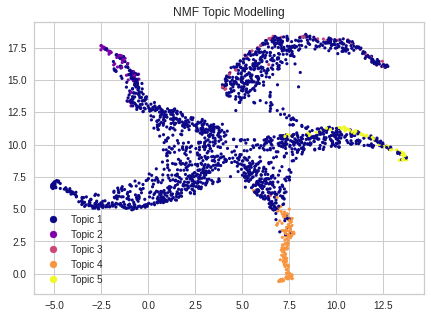

In [0]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(nmf)
plt.figure(figsize=(7,5))
plt.title("NMF Topic Modelling")
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, c= document_class["NMF"], edgecolor='none',cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels = classes)
plt.show()

# Question 2
Your boss at the news agency was extremely impressed with your work and has assigned you to a new job – summarising these news articles for their app. Your boss needs you to develop an extractive model that can build accurate summaries and still be computationally inexpensive.

A good text summary is short and crisp and yet retains the keywords in the original document. We can hence define a summary score as -

\begin{equation*}
Summary Score = (\frac{K_{S}}{K_{D}})(\frac{S_{D}-S_{S}}{S_{D}})\
\end{equation*}


where ks is the number of keywords in the summary and kd is the number of keywords in the document. Similarly, sD and ss are the number of sentences in the document and summary, respectively. A good summary will have a smaller number of sentences in the summary and a high number of keywords, hence a summary score of 1 is perfect and 0 is undesirable. 

Your goal is to develop a model that achieves an optimal summary score within a reasonable amount of time.


## Initialsing scoring metric

In [19]:
!pip install rake-nltk
from rake_nltk import Rake 
r = Rake()

def summary_score(summary, document):
  ss = len(sent_tokenize(summary))
  sd = len(sent_tokenize(document))

  kw = r.extract_keywords_from_text(summary)
  ks = len(r.get_ranked_phrases())

  kw = r.extract_keywords_from_text(document)
  kd = len(r.get_ranked_phrases())

  return (ks/kd)*((sd-ss)/sd)

## TFIDF Summarization

### Declaring Functions

In [0]:
def TFIDF_avg_summary(document):
  sentences = sent_tokenize(document)
  clean_sentences = list(map(TextPreprocessing.clean, sentences))
  vectorizer = TfidfVectorizer(smooth_idf = True)
  X = vectorizer.fit_transform(clean_sentences).toarray()

  sentence_scores = [(pos,sum(vector)) for pos, vector in enumerate(X)]
  sent_sum = 0
  for pair in sentence_scores:
    sent_sum+= pair[1]
  avg = sent_sum/X.shape[0]

  top_sentences = [i for i in sentence_scores if i[1]>=avg]
  top_sentences.sort(key = lambda x: x[0])
  summary = [sentences[pair[0]] for pair in top_sentences]
  return " ".join(summary)

def TFIDF_k_summary(k, document):
  sentences = sent_tokenize(document)
  clean_sentences = list(map(TextPreprocessing.clean, sentences))
  vectorizer = TfidfVectorizer(smooth_idf = True)
  X = vectorizer.fit_transform(clean_sentences).toarray()

  sentence_scores = [(pos,sum(vector)) for pos, vector in enumerate(X)]
  sentence_scores.sort(key = lambda x: x[1], reverse = True)
  topk_sentences = sentence_scores[:k]

  topk_sentences.sort(key = lambda x: x[0])
  summary = [sentences[pair[0]] for pair in topk_sentences]
  return " ".join(summary)

### Summarizing with TFIDF

#### Average Based

In [22]:
%%time
summaries_tfidf_avg = [TFIDF_avg_summary(doc) for doc in documents]
summary_scores_tfidf_avg = np.array([summary_score(summaries_tfidf_avg[i],documents[i]) for i in range(len(documents))], dtype = 'float')

CPU times: user 37.3 s, sys: 46 ms, total: 37.4 s
Wall time: 37.4 s


Text(0.5, 1.0, 'Document Size vs TF-IDF-Avg Summary Score')

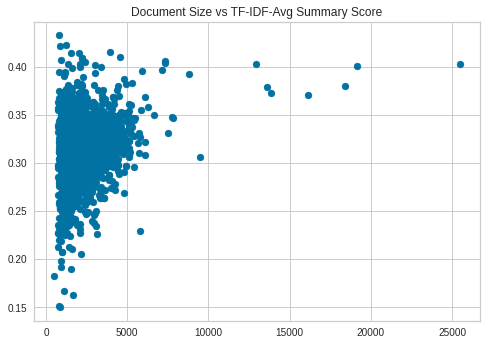

In [23]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_avg)
plt.title("Document Size vs TF-IDF-Avg Summary Score")

#### K-Proportion Based - 0.45

In [0]:
%%time
max_k = 0.95
k_values = []
kprop_means = []
for k in np.arange(0.05,max_k+0.05,0.05):
  k_values.append(k)
  summaries_tfidf_kprop = [TFIDF_k_summary(int(k*len(sent_tokenize(doc))), doc) for doc in documents]
  summary_scores_tfidf_kprop = np.array([summary_score(summaries_tfidf_kprop[i],documents[i]) for i in range(len(documents))], dtype = 'float')
  kprop_means.append(summary_scores_tfidf_kprop.mean())

In [0]:
plt.plot(k_values,kprop_means)
plt.title("K vs K-Proportion Summary Scores")

In [0]:
k_values[kprop_means.index(max(kprop_means))]

In [0]:
%%time
k = 0.45
summaries_tfidf_kprop = [TFIDF_k_summary(int(k*len(sent_tokenize(doc))), doc) for doc in documents]
summary_scores_tfidf_kprop = np.array([summary_score(summaries_tfidf_kprop[i],documents[i]) for i in range(len(documents))], dtype = 'float')

Text(0.5, 1.0, 'Document Size vs TF-IDF-K-Proportion Summary Score')

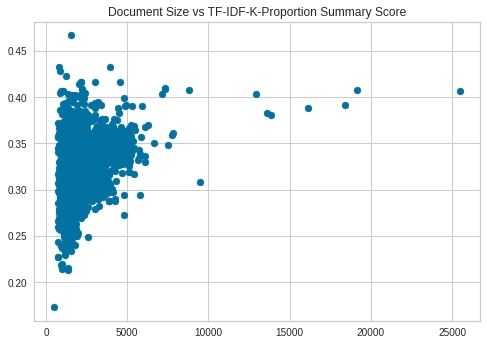

In [25]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_kprop)
plt.title("Document Size vs TF-IDF-K-Proportion Summary Score")

#### K-Sentence Based - 6

In [0]:
%%time
max_k = 50 #max(list(map(len,list(map(sent_tokenize,documents))))) - takes 3 hours
k_values = []
ksent_means = []
for k in np.arange(2,max_k+1):
  k_values.append(k)
  summaries_tfidf_ksent = [TFIDF_k_summary(k, doc) for doc in documents]
  summary_scores_tfidf_ksent = np.array([summary_score(summaries_tfidf_ksent[i],documents[i]) for i in range(len(documents))], dtype = 'float')
  ksent_means.append(summary_scores_tfidf_ksent.mean())

In [0]:
plt.plot(k_values,ksent_means)
plt.title("K vs K-Sentences Summary Scores")

In [0]:
k_values[ksent_means.index(max(ksent_means))]

In [26]:
%%time
k = 6
summaries_tfidf_ksent = [TFIDF_k_summary(k, doc) for doc in documents]
summary_scores_tfidf_ksent = np.array([summary_score(summaries_tfidf_ksent[i],documents[i]) for i in range(len(documents))], dtype = 'float')

CPU times: user 36.4 s, sys: 32.4 ms, total: 36.4 s
Wall time: 36.5 s


Text(0.5, 1.0, 'Document Size vs TF-IDF-K-Sentences Summary Score')

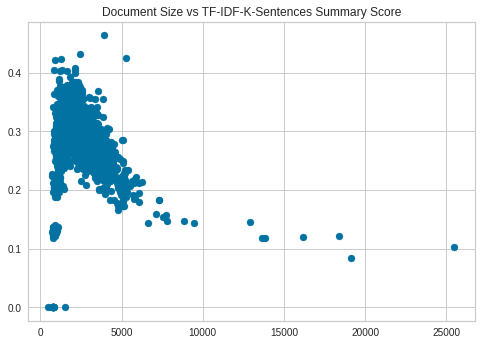

In [27]:
plt.scatter(list(map(len,documents)),summary_scores_tfidf_ksent)
plt.title("Document Size vs TF-IDF-K-Sentences Summary Score")

### TFIDF Results

In [28]:
print("Average Score using Average Method:", summary_scores_tfidf_avg.mean())
print("Average Score using K-Proportion Method:", summary_scores_tfidf_kprop.mean())
print("Average Score using K-Sentences Method:", summary_scores_tfidf_ksent.mean())

Average Score using Average Method: 0.3116141256206168
Average Score using K-Proportion Method: 0.3235084705351527
Average Score using K-Sentences Method: 0.2856592297626625


## LSA Summarization

### Declaring Functions

In [0]:
def LSAsummarize(k, document):
    X = sent_tokenize(document)
    X_clean = list(map(TextPreprocessing.clean, X))
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X_transformed = vectorizer.fit_transform(X_clean)
    feature_count = len(vectorizer.get_feature_names())
    if k>feature_count:
        k = feature_count-1
    svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=10, random_state=122)
    lsa = svd.fit_transform(X_transformed)
    Sigma = svd.singular_values_
    column_names = ["Topic {}".format(str(i+1)) for i in range(lsa.shape[1])]
    document_topic_matrix = pd.DataFrame(lsa,columns=column_names)
    document_topic_matrix["Document"] = X
    document_topic_matrix["Position"] = [i for i in range(len(X))]
    dic = vectorizer.get_feature_names()
    term_topic_matrix = pd.DataFrame(svd.components_, index = column_names, columns = (dic)).T

    agg = sum(Sigma)
    percentage_topic = (Sigma/agg)*len(X)
    sigma = percentage_topic.astype(int)

    summary = []
    column_names = ["Topic {}".format(str(i+1)) for i in range(len(sigma))]
    for i in range(len(column_names)):
        num_sent = sigma[i]
        topic = column_names[i]
        document_topic_matrix.sort_values(by = topic,inplace=True,ascending = False)
        
        document_topic_matrix.reset_index(inplace=True)
        document_topic_matrix.drop(columns = ["index"],inplace=True)
        for j in range(num_sent):
            item = (document_topic_matrix["Document"][j],document_topic_matrix["Position"][j])
            if item not in summary:
                summary.append(item)
    summary.sort(key = lambda x: x[1])
    sent = [i[0] for i in summary]
    return " ".join(sent)

### Finding best K

In [39]:
%%time
max_k = 30
k_values = []
ktopics_means = []
for k in range(2,max_k+1):
  k_values.append(k)
  print(k,end=" ")
  summaries_LSA = [LSAsummarize(k,doc) for doc in documents]
  summary_scores_LSA = np.array([summary_score(summaries_LSA[i],documents[i]) for i in range(len(documents))], dtype = "float")
  ktopics_means.append(summary_scores_LSA.mean())

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 CPU times: user 1h 30min 1s, sys: 1h 27s, total: 2h 30min 28s
Wall time: 1h 18min 25s


Text(0.5, 1.0, 'K vs K-Topics Summary Scores')

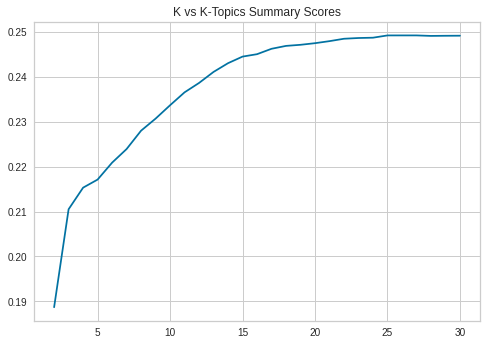

In [40]:
plt.plot(k_values,ktopics_means)
plt.title("K vs K-Topics Summary Scores")

In [45]:
k_values[ktopics_means.index(max(ktopics_means))]

27

In [46]:
%%time
k = 27
summaries_LSA = [LSAsummarize(k,doc) for doc in documents]
summary_scores_LSA = np.array([summary_score(summaries_LSA[i],documents[i]) for i in range(len(documents))], dtype = "float")

CPU times: user 3min 47s, sys: 2min 34s, total: 6min 21s
Wall time: 3min 18s


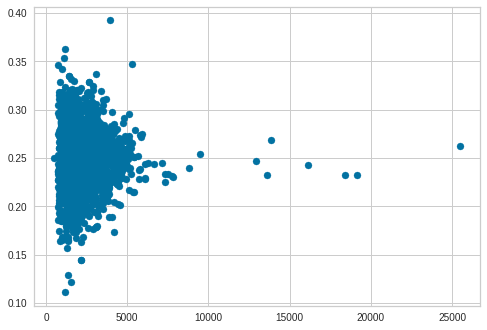

In [47]:
plt.scatter(list(map(len,documents)),summary_scores_LSA)

### Obtaining Result

In [49]:
print("Average Score using LSA:", summary_scores_LSA.mean())

Average Score using LSA: 0.2492609149072802
